# Bank Marketing Dataset

### This dataset is based on the "Bank Marketing" UCI dataset 

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

 

It contains information about the marketing campaign impact of a bank specifically through telemarketing. It includes 20 independent variables of which 5 are the nationwide socio-economic factors pertaining to the bank's operating country. The attributes are as follows;

 

#### Input variables:
- age : age of the person.

- job : defines the job role of the person:
    - "admin." : "Administrative workers are those who provide support to a company. This support might include general office management , answering phones, speaking with clients, assisting an employer, clerical work",
    - "blue-collar" : "Blue collared jobs are the ones that require very low or no level of expertise. These are manual jobs that need no specialized skill set or ability. They are also low paying jobs, and they hire daily wage earners. Sanitation workers, construction site breadwinners, industry workers, and miners",
    - "entrepreneur" : "entrepreneurs include those in marketing, business development and management.",
    - "housemaid" : "Maids are responsible for the cleanliness and neatness of the environment they have been tasked to take care ",
    - "management" : "Administrative Services Manager,Computer Information Systems Manager. IT ,Food Services Manager",
    - "retired" : "the person who have done his employment or he/she is 60+",
    - "self-employed" : "Someone who is self-employed is the owner of a business, an individual who earns a living by working for himself/herself",
    - "services" : "Govt service and any",
    - "student" : "who is doing study or doing part time",
    - "technician" : "Technicians are skilled professionals employed in almost every industry. They repair, install, replace, and service different systems and equipment. Technicians typically work alongside other skilled workers and should be able to read instructions and communicate effectively.",
    - "unemployed" : "who is not doing job are unemployed",
    - "unknown" : " Don't know job")
- marital : marital status 
    - "divorced",
    - "married",
    - "single",
    - "unknown", note: "divorced" means divorced or widowed)
- education ("basic.4y","basic.6y","basic.9y",
    - "high.school",
    - "illiterate",
    - "professional.course",
    - "university.degree",
    - "unknown")
- default : Simply, default means non-payment of a loan availed by a borrower. A willful defaulter is an entity or a person that has not paid the loan back despite the ability to repay it. ( "no","yes","unknown")
- housing : Does the customer have a housing loan? ("no","yes","unknown")
- loan : Does the customer have a personal loan? "no","yes","unknown")

#### Related with the last contact of the current campaign:
- Contact : communication type ("cellular","telephone") 
- Month : last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")
- day_of_week : last contact day of the week ("mon","tue","wed","thu","fri")
- Duration : last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
- Campaign: Number of contacts performed during this campaign and for this client includes last contact
- pdays:  14- number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- Previous: number of contacts performed before this campaign and for this client
- poutcome: outcome of the previous marketing campaign:
    - categorical:
        - "failure",
        - "nonexistent",
        - "success")

#### Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator
- cons.price.idx: consumer price index - monthly indicator     
- cons.conf.idx: consumer confidence index - monthly indicator     
- euribor3m: euribor 3 month rate - daily indicator
- nr.employed: number of employees - quarterly indicator

#### Output variable:
- y - has the client subscribed to a term deposit? ("yes","no")

In [1]:
# all libraries of python.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [2]:
bank_test = pd.read_csv("test.csv")       # this is test dataset.
bank_train = pd.read_csv("train.csv")     # this is train dataset.

In [3]:
bank = pd.merge(bank_test,bank_train)     # here i am merging two dataset with name of bank.

## Explorateory data analysis.

In [4]:
bank.head()       # here i am checking head of the dataset.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank.tail()      # here i am checking tail of the dataset.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


### Shape function.

In [6]:
bank.shape     # so, this is shape function. by this i can see no. of columns and rows.

(4521, 17)

### Null values.

In [7]:
bank.isnull().sum()      # here i am checking null value or total no. of null value in columns.
                         # so, here is no null values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Unique value.

In [8]:
bank.nunique()       # here i am checking the unique columns.
                     # by this i can analyse of any kind of issue and identify categorical columns.

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

### Info() function.

In [9]:
bank.info()      # information about the columns with Dtype.
                 # with this i can check null values also.
                 # by this i can also check no. of entries of rows and total no. of columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


### Changing unknown values into Nan.

In [10]:
# i did analyse all the columns all int Dtype column is fine. But object Dtype column contains "unknown".

bank.replace(r'unknown',np.nan, inplace=True)        # i found some of the column with unknown.
                                                     # so, i am using this command to convert unknown into nan.

### Changing column Dtype.

In [11]:
# in the dataset i found some of the columns Dtype is object. but the behaviour of the column is category.
# so, by this command i did convert into category.
# by this i can analyse it well.

category = ["job","marital","education","default","housing","loan","contact","month","poutcome","y"]

for i in category:
    bank[i] = bank[i].astype('category')

### Summary of the column.

In [12]:
# so, this is summary of the columns.

bank.describe(include='all')            # by this i can judge any mistake in min, max, etc.
                                        # the basic understanding to check all the columns contain right values or not.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483,4521,4334,4521,4521.000000,4521,4521,3197,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,816,4521
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,490,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Statistics of missing value.

<AxesSubplot:>

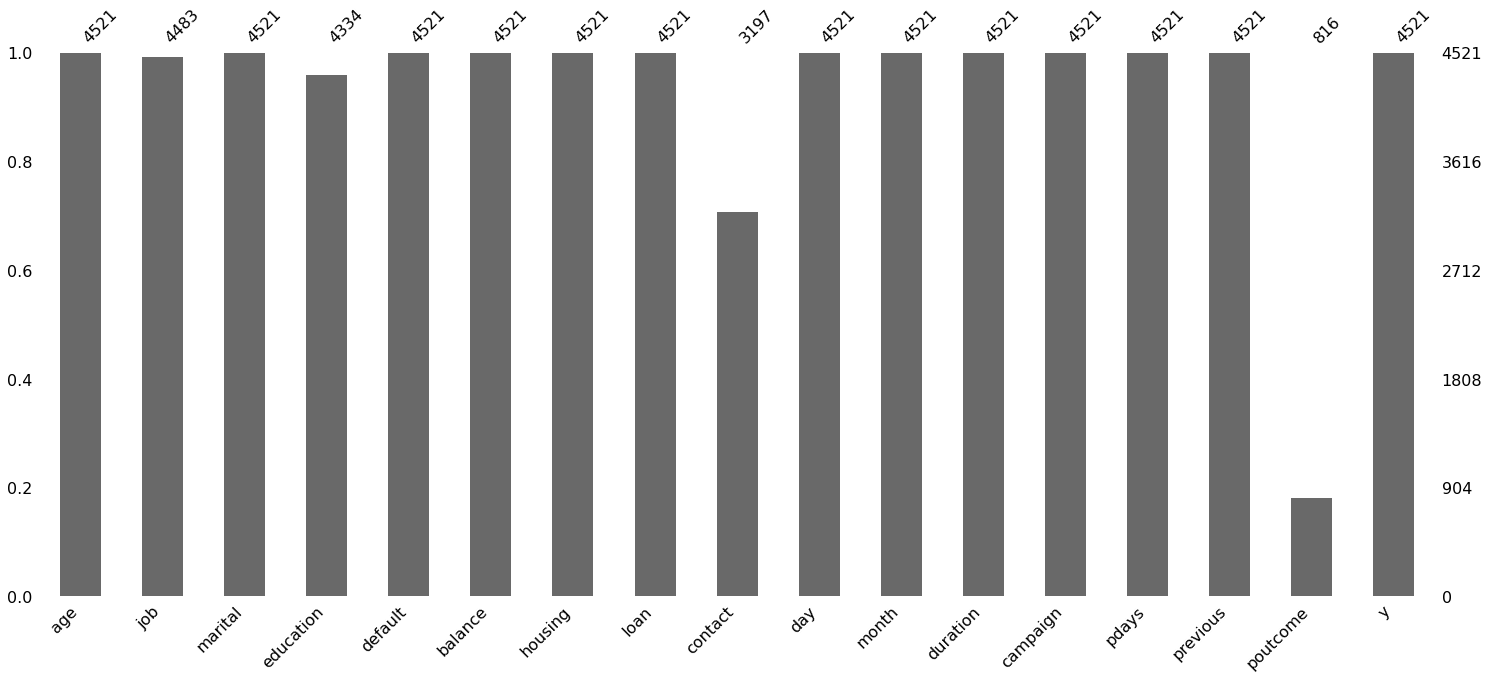

In [13]:
# here i am using this library. because to check the missing value.

msno.bar(bank)

### Checking patterns of null values in column.

<AxesSubplot:>

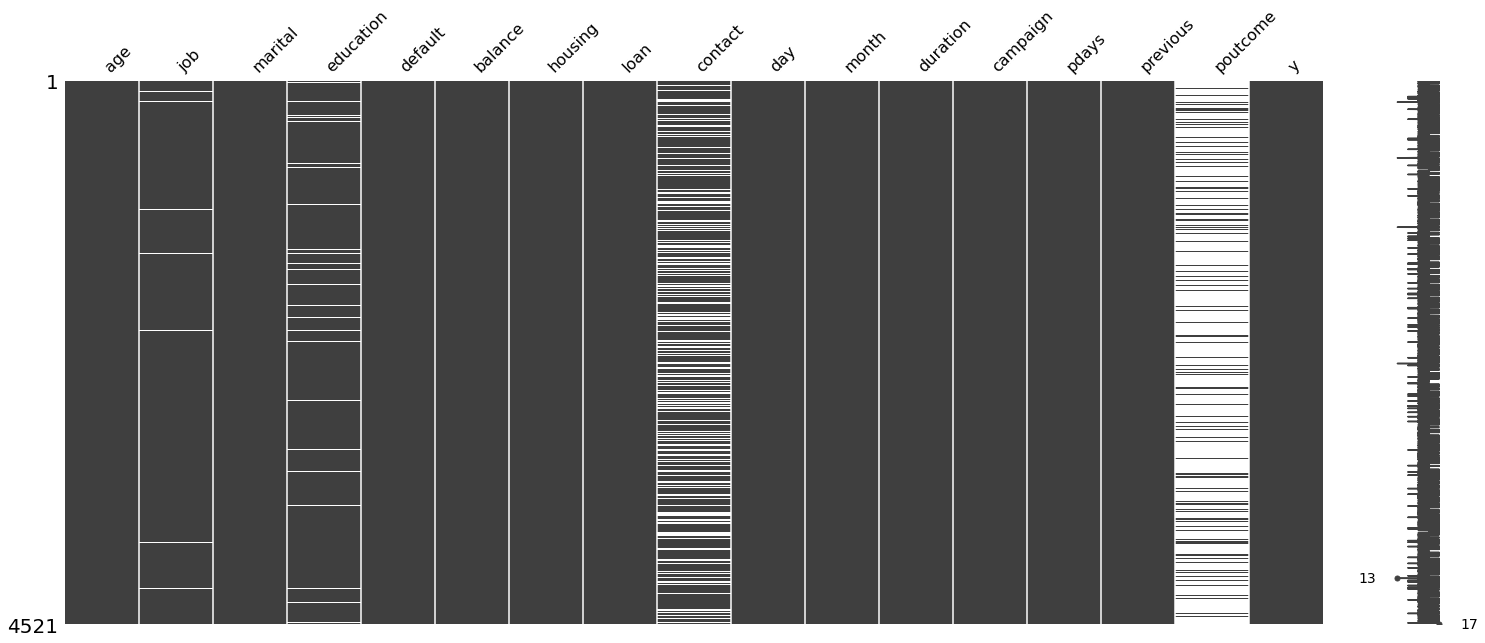

In [14]:
# here i am checking patterns of all columns.
# poutcome, contact, education, job have pattens.

msno.matrix(bank)             # by this analysis i can judge which column have patterns and which column don't. 

### Checking coorelation.

<AxesSubplot:>

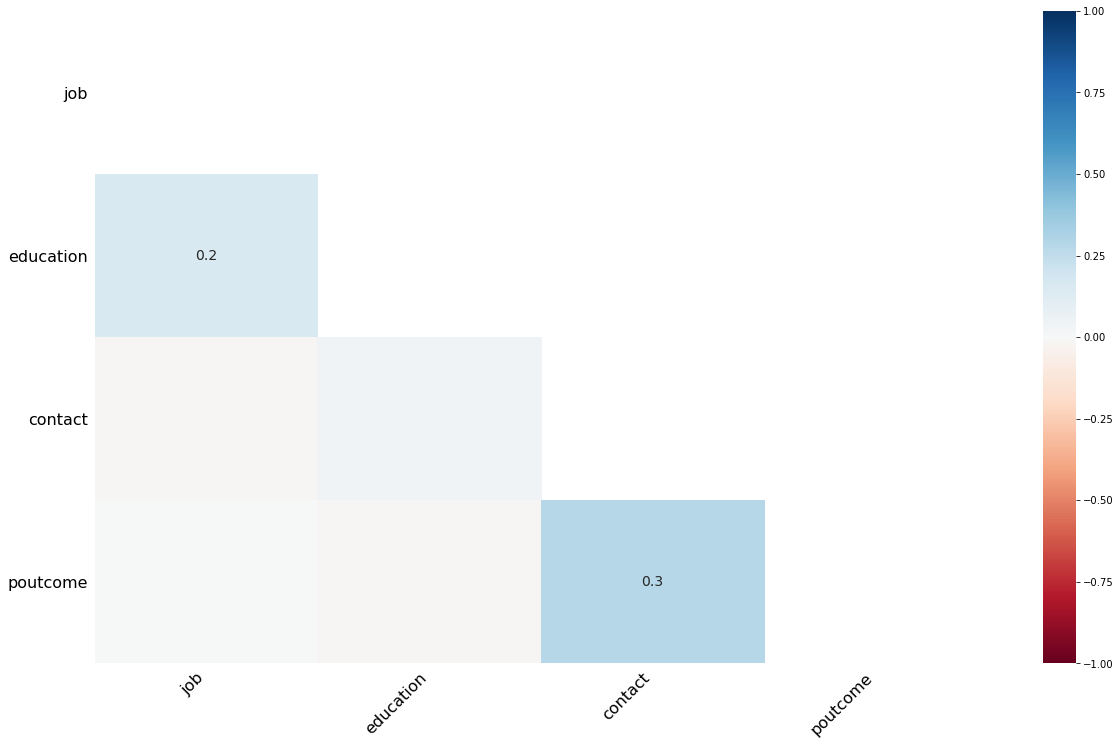

In [15]:
# so, this is the heat-map by this you can find coorelation of each and every column.
# the darker bluish part it means high coorelation if dull or red so there is no coorelation.

msno.heatmap(bank)

### Checking numerical patterns with columns.

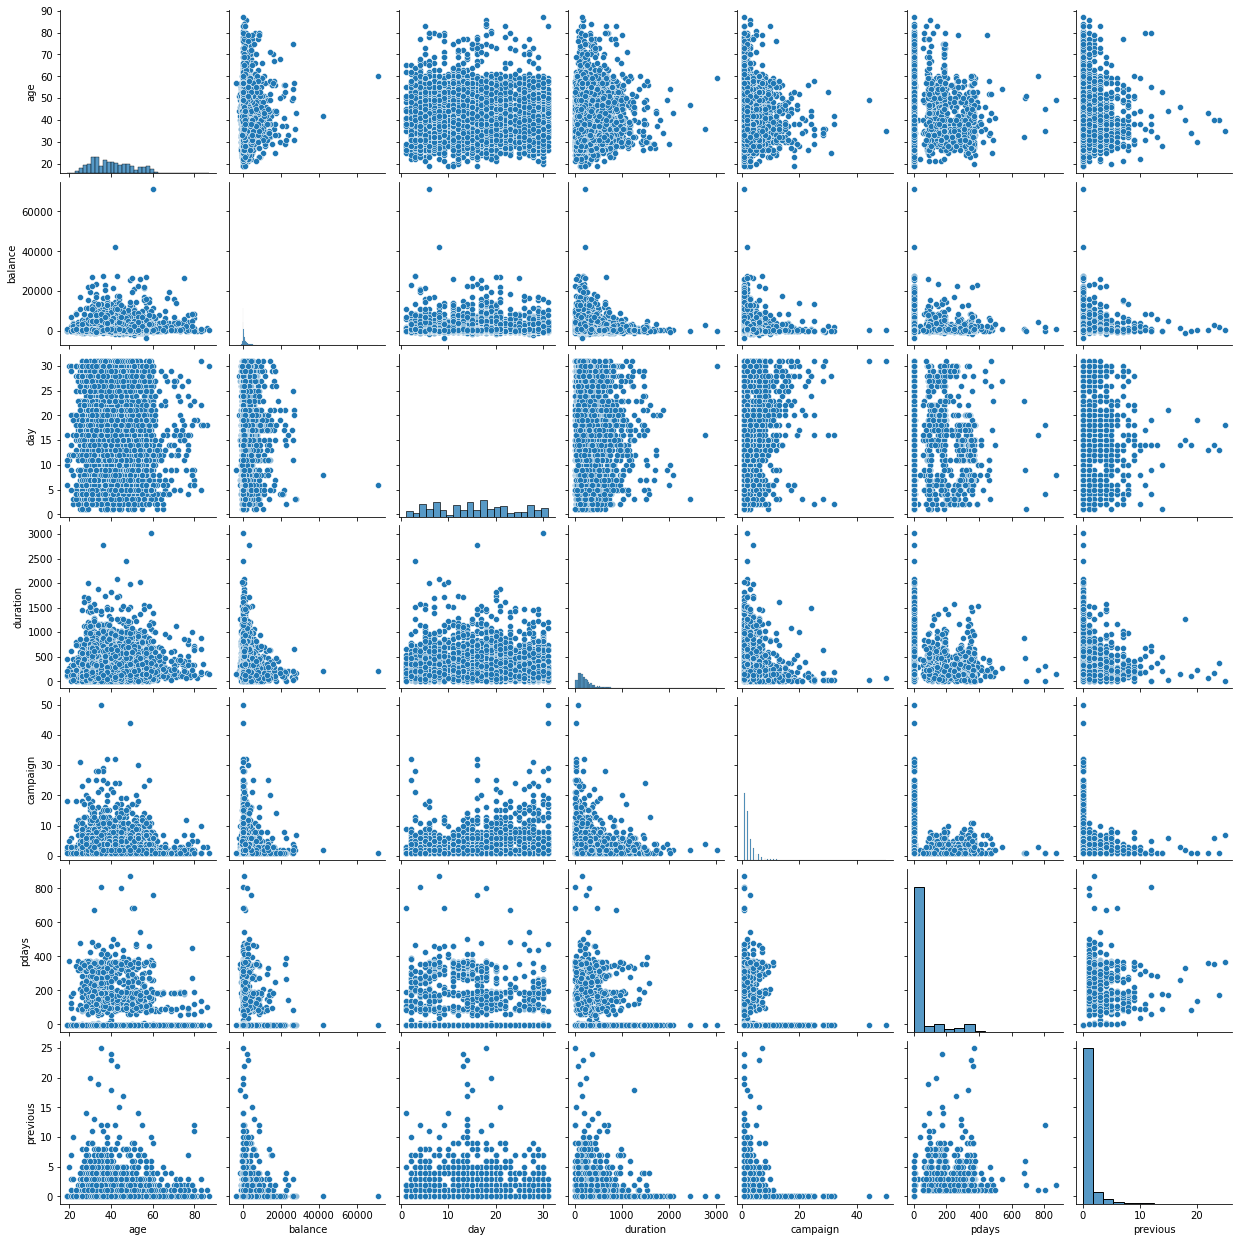

In [16]:
# this is pair plot. the purpose of using is to show or check the collinearity of each column with other.

sns.pairplot(bank)

### Log transformation.(ML)

In [17]:
# here i am using log transformation. 
# but i do apply in two columns because other columns contain negative and zero values. and log transformation is not good for that.

bank['age'] = np.log(bank['age'])
bank['duration'] = np.log(bank['duration'])

###  Analysis after log transformation ( checking skewness ).


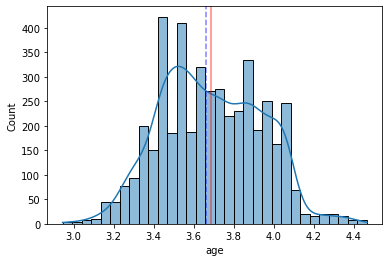

In [18]:
# here i am analysing age. so, this is symmetric.
# mean and median are close to each other.

sns.histplot(data=bank['age'],kde=True)
plt.axvline(x=bank.age.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=bank.age.median(),c='blue',alpha=0.5,ls='--',label='median')
plt.show()

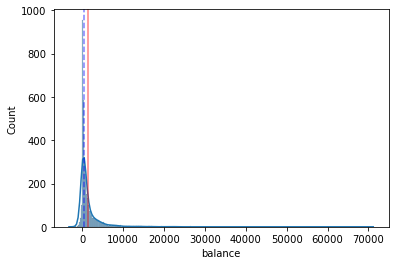

In [19]:
# here i am analysing balance. so, this is right skewed.
# mean and median are close to each other.
# but in this i have seen balance may varies from 0 to 70,000.
# so, i am not changing or using any transformation. because it depands on the customer most of the people have balance 0 but some people may have balance 50,000 to 70,000.

sns.histplot(data=bank['balance'],kde=True)
plt.axvline(x=bank.balance.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=bank.balance.median(),c='blue',alpha=0.5,ls='--',label='median')
plt.show()

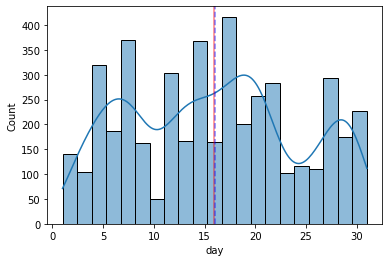

In [20]:
# here i am analysing day. so, this is similar to symmetric.
# mean and median are touching to each other. and it is perfect.

sns.histplot(data=bank['day'],kde=True)
plt.axvline(x=bank.day.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=bank.day.median(),c='blue',alpha=0.5,ls='--',label='median')
plt.show()

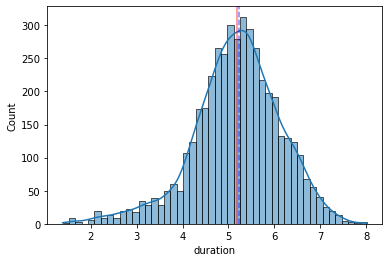

In [21]:
# here i am analysing duration. so, this is symmetric.
# mean and median are touching to each other. and it is perfectly made.

sns.histplot(data=bank['duration'],kde=True)
plt.axvline(x=bank.duration.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=bank.duration.median(),c='blue',alpha=0.5,ls='--',label='median')
plt.show()

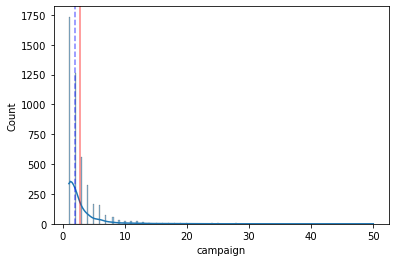

In [22]:
# here i am analysing campaign. so, this is symmetric.
# mean and median are close to each other.
# so, this is the information of number of previous performed campaign.

sns.histplot(data=bank['campaign'],kde=True)
plt.axvline(x=bank.campaign.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=bank.campaign.median(),c='blue',alpha=0.5,ls='--',label='median')
plt.show()

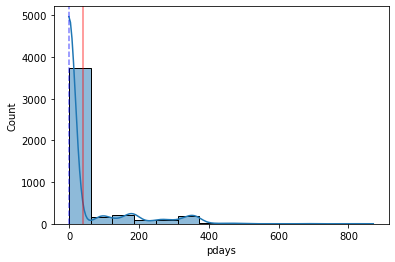

In [23]:
# here i am analysing pdays means, last contacted and pevious contacted.
# and here i am checking skewness.

sns.histplot(data=bank['pdays'],kde=True)
plt.axvline(x=bank.pdays.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=bank.pdays.median(),c='blue',alpha=0.5,ls='--',label='median')
plt.show()

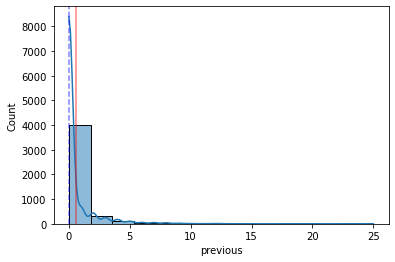

In [24]:
# here i am analysing previous means, number of contact performed before the campaign.
# and it is right skewed.

sns.histplot(data=bank['previous'],kde=True)
plt.axvline(x=bank.previous.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=bank.previous.median(),c='blue',alpha=0.5,ls='--',label='median')
plt.show()

### Please show how the categorical variables are related to each other and also their distribution among the numerical variables.

HERE I AM APPLYING THREE ANALYSIS IN THIS :-

#### UNIVARIATE ANALYSIS.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

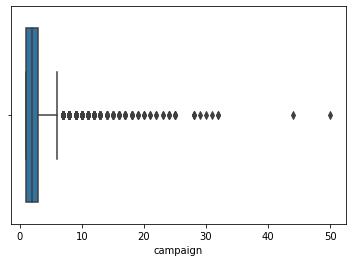

In [25]:
# here i am seeing number of contact performed during this campaign.
# in this analysis there is lot's of outliers.
# the maximum contact performed is 50.


sns.boxplot(bank["campaign"])

<AxesSubplot:xlabel='age', ylabel='Count'>

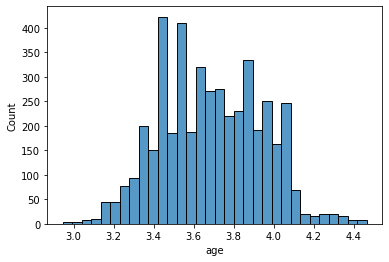

In [26]:
# i am doing analysis of age columns.
# most of age group people are engage in 3.4 or 34 to 35.

sns.histplot(data=bank["age"])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

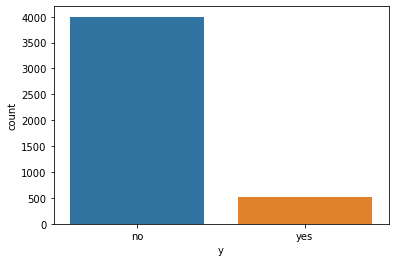

In [27]:
# here i am using count plot.
# in this i have seen, there are lot's of people are not subscribing "deposit".
# there are less people who is interested in subscription. i can say that in "no category" young peoples are there in it. so, they are less interested in deposit.

sns.countplot(bank["y"])

#### BIVARIATE ANALYSIS.

<AxesSubplot:xlabel='poutcome', ylabel='previous'>

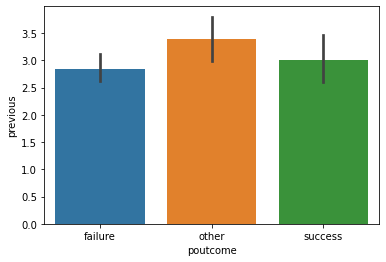

In [28]:
# here i am comparing poutcome with previous.
# the most previous contacted is "other". outliers is also high in this.

sns.barplot(x="poutcome",y="previous",data=bank)

<AxesSubplot:xlabel='month', ylabel='previous'>

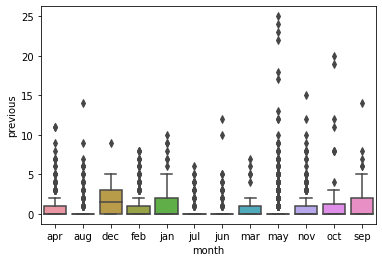

In [29]:
# here i am comparing month with previous.
# previous means, the previous contacted.
# in this i am judging the most previously contacted in month is "may". because "may" month have higher outliers.

sns.boxplot(x="month",y="previous",data=bank)

<AxesSubplot:xlabel='day', ylabel='balance'>

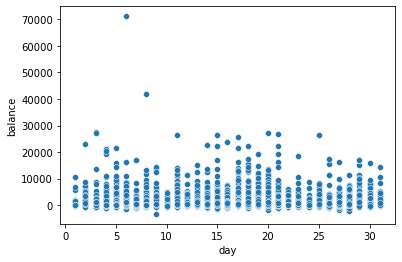

In [30]:
# here i am analysing day with balance.
# according to my understanding in every day in month balance is not reaching  beyond to 30,000
# on highest outliers is on 7th day.

sns.scatterplot(x="day",y="balance",data=bank)

#### MULTIVARIATE ANALYSIS.

<AxesSubplot:xlabel='job', ylabel='age'>

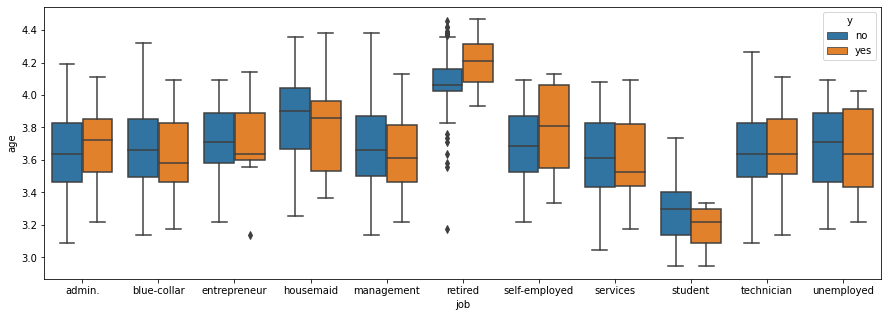

In [31]:
# here i am checking which age group people with job profile has subscription of deposit.
# the highest subriction of deposit rate  is retired person.

""" because at the older age people like to deposit money for future medicare or any big problem. """

plt.figure(figsize=(15,5))
sns.boxplot(x="job",y="age",hue="y",data=bank)

<AxesSubplot:xlabel='job', ylabel='age'>

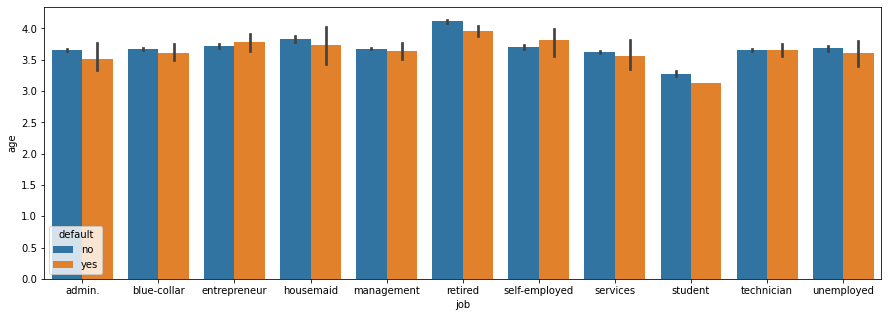

In [32]:
# here i am checking which age group people with job profile has default rate.

""" here default status of every category whether it is retired person, student, self-employed. in this i have seen
     everything is fine some are paying and some of have high default rate.
     but the maximum default rate is for retired person."""

plt.figure(figsize=(15,5))
sns.barplot(x="job",y="age",hue="default",data=bank)

<AxesSubplot:xlabel='job', ylabel='campaign'>

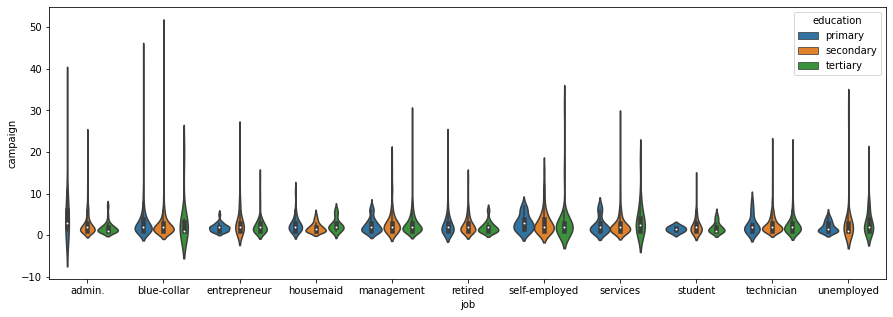

In [33]:
# here i am checking education level with job profile. campaign - it is a phone call (number of contact performed during this campaign.) 


""" in blue-collar job have the highest no. of outliers in campaign. 
    means, they have secondary level of education and they are daily wagers. so, bank did a most contact to blue-collar job for the
    benefit of this category group and by the deposit they can secure their future."""

""" if i talk the lowest outliers then it is admin job profile have primary education. bank did less or never contact this job profile. """

plt.figure(figsize=(15,5))
sns.violinplot(x="job",y="campaign",hue="education",data=bank)

### The socio-economic variables are a statistical indicator of the customer themselves based on various other factors, so it has a lot of information in it which should be used for analysis.

As Mentioned Above, The Social And Economic Background Plays A Vital Role In Society.

<AxesSubplot:xlabel='job', ylabel='age'>

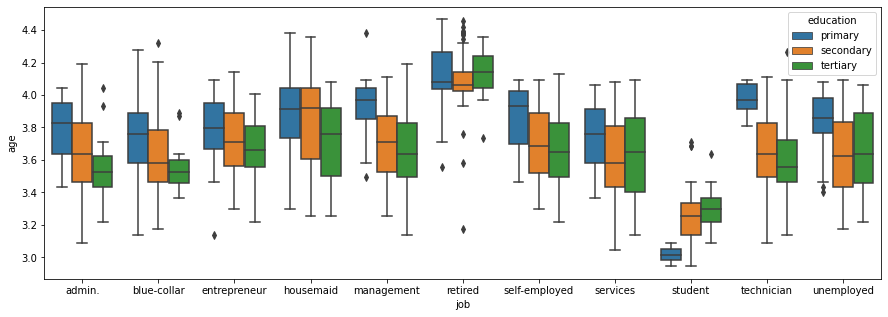

In [34]:
# here i am comparing job with education and age.

""" here i am checking every group of people with job profile and checking the education level.
    because education level is must, to analyse anything. """

""" student with primary education have the lowest median than other job profile. 
    because i am comparing with age. so, they are less in age but have good level of education skill at this age. """

""" the higher group which is retired person with (primary education) because they are older than other group of people   """

plt.figure(figsize=(15,5))
sns.boxplot(x="job",y="age",hue="education",data=bank)

<AxesSubplot:xlabel='marital', ylabel='balance'>

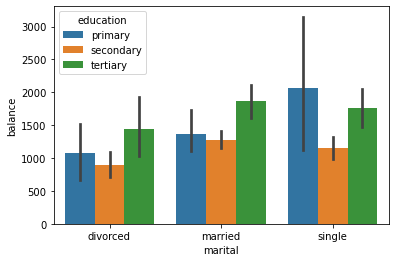

In [35]:
# here i am checking marital status with balance and education.

""" here ia am checking merital status with education qualification checking the balance of every person.
    singles have the highest level of balance but education level is primary."""


sns.barplot(x="marital",y="balance",hue="education",data=bank)

### Try and find out which campaign was effective for which type/group of people and see if they have anything common among them.

<AxesSubplot:xlabel='marital', ylabel='campaign'>

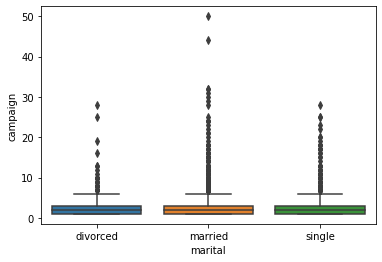

In [36]:
# here i am comparing campaign with marital.

""" the person who is married have the highest ouliers in campaign.
    it means, the bank did most contacted to maried person for subscription of deposit for the future safety and for childrens also. 
    and also interested in saving for future use. """

sns.boxplot(x="marital",y="campaign",data=bank)

<AxesSubplot:xlabel='education', ylabel='campaign'>

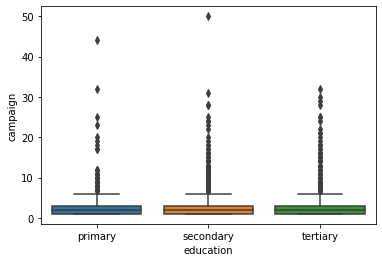

In [37]:
# here i am comparing education level with campaign.

""" the bank did the most call to secondary level of people. have the highest level of outliers.
    because of they are medium level of category in this it means they have studied 8th, 9th, 10th.
    they may be daily worker or salary based. but some of the amount they spend and some amount they like to save.
    because in this category people like to save little or small amount """

""" but if i talk about tertiary level they are dr, diploma holder, graduate, etc. this category income is high so they
    don't show interest in subscription in deposits. """

sns.boxplot(x="education",y="campaign",data=bank)

<AxesSubplot:xlabel='job', ylabel='campaign'>

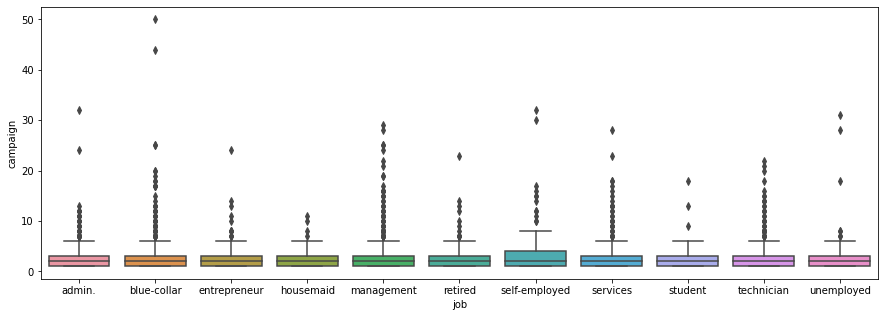

In [38]:
# here i am comparing job with campaign.

""" the bank did the most call to blue-collar job beacuse they on daily wages or labour. they like to save some amount of money for future use.
     because they have lower but upper than primary category. some of the amount they spend but rest they like to save.
     they may interested in deposit subscription because the spending pattern of this age group is high.
     so, they may interested in subscription. """

plt.figure(figsize=(15,5))
sns.boxplot(x="job",y="campaign",data=bank)

### Do the same for the people who did not respond to a campaign well and see if they have anything in common with each other.

<AxesSubplot:xlabel='marital', ylabel='campaign'>

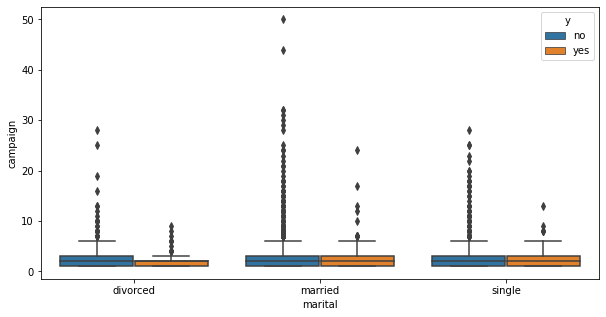

In [45]:
# here i am comparing marital and campaign with y.
# in this analysis, i have seen married people have high subscription rate.
# but if i took divorced and single in "No subscription" is very high.
# if i take divorced and single then both "subsription" is very less.

""" according to my understanding, the divorced people are less interested in "subscription". because they are alone that's
    why they are less interested. if i take single then singles don't have family or alone that's why they also are less
    interested in this. """

plt.figure(figsize=(10,5))
sns.boxplot(x="marital",y="campaign",hue="y",data=bank)

<AxesSubplot:xlabel='y', ylabel='campaign'>

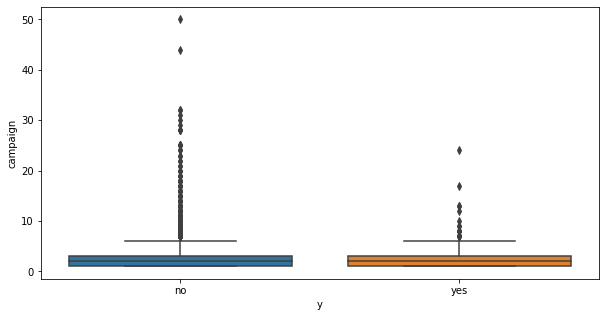

In [40]:
# here i am comparing campaign with y(subscription).

""" here i can see the difference of who is interested in this or not. here did a lot of contacted to people.
    but result is less. because in this so many category falls under like single, divorced, married and etc.
    everyone have different type of understanding."""

plt.figure(figsize=(10,5))
sns.boxplot(x="y",y="campaign",data=bank)

<AxesSubplot:xlabel='education', ylabel='campaign'>

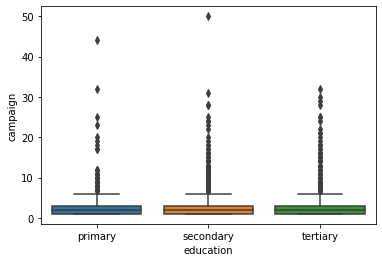

In [41]:
# here i am comparing education with campaign.
# the highest level outliers in secondary education. and it is like middle category people.

""" according to my understanding, primary and secondary category people are labour or they work on daily basis.
    there spending level is so high than teritary level of people.
    so, bank like to approach this kind of people who hardly to save money. by the subscription policy they can get 
    advantage in coming future. """

sns.boxplot(x="education",y="campaign",data=bank)

<AxesSubplot:xlabel='job', ylabel='campaign'>

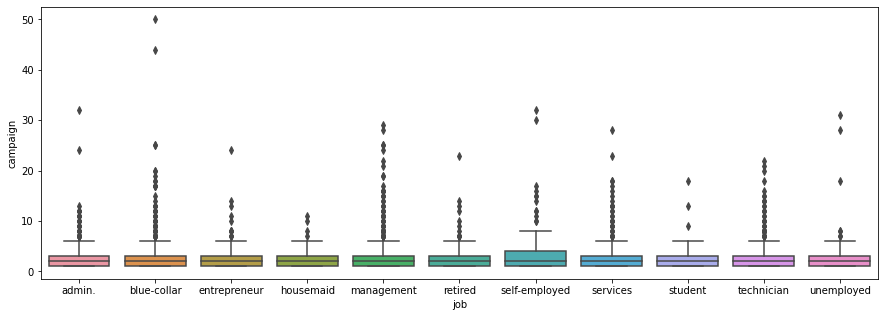

In [42]:
# here i am comparing job with camaign.
# here bank tried to reach most or last contacted to blue-collar job. 

""" housemaid, student, unemployed, etc bank did the call but this category are less interested in doing savings. """

""" blue-collar job i took here as a middle in it. it means, they having high level of spending and less savings 
    but they can do manage or save if bank provide any good kind of policy to people. """

plt.figure(figsize=(15,5))
sns.boxplot(x="job",y="campaign",data=bank)